## **Introduction to Sonova Business Case**

Over 400 million people, or 5% of the world’s population, suffers from disabling hearing loss and it is estimated that by 2050 this number will almost double. For over 70 years Sonova has been working at the cutting edge of hearing care bringing products and services that transform the lives of millions of people across the world.


We generate diverse data that includes product usage, patient health indicators, customer behaviour, product reliability and more.

Sonova’s Audiological Care (AC) organisation is one of the largest business units comprising of a network of stores through which consumers can purchase hearing aids and other accessories directly. One of the key objectives in AC is to continuously increase the number of customers who repurchase a hearing aid from one of our stores.

In an effort to improve the repurchase rate, the VP of Marketing has asked you to use historical data to better understand the key drivers of repurchase and to build a data science model that enables the marketing department to better tailor their promotional campaigns.

**Describe how would you map the business problem in analytics terms. Identify what kind of approach may be used to address this.**


**Business objective** : Increase the number of customers who repurchase the hearing aid from one of Sonova Stores. 

**Analytics Perspective** : After analyzing the sales data, i can track the customers who have repurchased the hearing aid in the past. These customers are mostly likely to buy from Sonova Stores again. Also there is another set of customers, who have a valid discount code, they are also one of the contenders for repurchase of hearing aids. Considering this as a classification problem, I want to identify which customers are likely to repurchase, and i will also identify the significant drivers to identify the factors behind the repurchase.

## **Import Libraries and Package**

In [99]:
!pip3 install --upgrade nbformat
!pip3 install --upgrade plotly
!pip3 install --upgrade geocoder

In [100]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
from IPython.display import display
from plotly.graph_objects import Layout

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns


#for text processing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

#for language detection
!pip install langdetect
import langdetect

import spacy
from spacy import displacy
#from collections import stopwords
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Data Extraction and Initial Visualization**

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import os
os.listdir('/content/drive/MyDrive/Sonova')

['calls.csv',
 'sale.csv',
 'contacts.csv',
 'audiograms.csv',
 'CanadianPostalCodes202108.csv',
 'dataset.csv',
 'data.csv',
 'y_Train.csv',
 'y_Test.csv',
 'Test.parquet',
 'Train.parquet',
 'DataSet_Version1.csv']

## **Audiograms**

In [103]:
audiogram = pd.read_csv('/content/drive/MyDrive/Sonova/audiograms.csv')

In [104]:
audiogram.drop_duplicates(subset=['Contact_ID'], keep='last',inplace=True) #assuming the last records are most recent. Found duplicates
audiogram.head(2)

Contact_ID Combined Loss Left Loss Level Right Loss Level
0  Foo1004575            L3              L3               L3
2  Foo2035934            L3              L4               L2

In [105]:
audiogram.shape

(387277, 4)

#### **Frequency Evaluation for combined loss**

In [106]:
loss = audiogram['Combined Loss'].value_counts()
Combined_Loss = pd.DataFrame({
'Combined Loss': loss.index,
'Frequency': loss.values,
'Percent': ((loss.values/loss.values.sum())*100).round(0),
'Cumulative Frequency': loss.values.cumsum(),
'Cumulative Percent': ((loss.values.cumsum()/loss.values.sum())*100).round(0)
})
Combined_Loss

Combined Loss  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0            L3      69861     27.0                 69861                27.0
1            L1      64678     25.0                134539                53.0
2            L2      56110     22.0                190649                75.0
3            L4      45134     18.0                235783                92.0
4            L5      15470      6.0                251253                98.0
5            L6       3865      2.0                255118               100.0

#### **DATA VIZ : Most Affected Loss Category - Combined Loss**

In [107]:
colors = ['Loss Category Others'] * 6
colors[5] = 'Most Affected Loss Category'
Combined_Loss = Combined_Loss.sort_values(by=['Percent'])
fig = px.bar(Combined_Loss, y="Combined Loss", x="Percent", orientation='h', width = 1000, height=500,color=colors,title="Combined Loss Data Analysis")
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='Combined Loss: %{y} <br> Percentage: %{x}%') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))
fig.show()

#### **Frequency Evaluation for left loss level, right loss level**

In [108]:
loss = audiogram['Left Loss Level'].value_counts()
lossl = pd.DataFrame({
'Left Loss Level': loss.index,
'Frequency': loss.values,
'Percent': ((loss.values/loss.values.sum())*100).round(0),
'Cumulative Frequency': loss.values.cumsum(),
'Cumulative Percent': ((loss.values.cumsum()/loss.values.sum())*100).round(0)
})
lossl

Left Loss Level  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0              L1     112580     30.0                112580                30.0
1              L3      90526     24.0                203106                54.0
2              L2      77913     21.0                281019                75.0
3              L4      57589     15.0                338608                91.0
4              L5      22188      6.0                360796                97.0
5              L6       7622      2.0                368418                99.0
6              L9       3510      1.0                371928               100.0
7              L8       1043      0.0                372971               100.0
8              L7        631      0.0                373602               100.0

In [109]:
loss = audiogram['Right Loss Level'].value_counts()
lossr = pd.DataFrame({
'Right Loss Level': loss.index,
'Frequency': loss.values,
'Percent': ((loss.values/loss.values.sum())*100).round(0),
'Cumulative Frequency': loss.values.cumsum(),
'Cumulative Percent': ((loss.values.cumsum()/loss.values.sum())*100).round(0)
})
lossr

Right Loss Level  Frequency  ...  Cumulative Frequency  Cumulative Percent
0               L1     114880  ...                114880                31.0
1               L3      87758  ...                202638                55.0
2               L2      78051  ...                280689                76.0
3               L4      56216  ...                336905                91.0
4               L5      21529  ...                358434                97.0
5               L6       7560  ...                365994                99.0
6               L9       3503  ...                369497               100.0
7               L8       1017  ...                370514               100.0
8               L7        698  ...                371212               100.0

[9 rows x 5 columns]

#### **DATA VIZ : Most Affected Loss Category : left loss level, right loss level**

In [110]:
colors = ['Loss Category Others'] * 9
colors[8] = 'Most Affected Loss Category'

from plotly.subplots import make_subplots
import plotly.graph_objects as go

lossl = lossl.sort_values(by=['Percent'])
lossr = lossr.sort_values(by=['Percent'])

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2, shared_yaxes = False, subplot_titles=("Left Loss Level","Right Loss Level")
)

# Add traces
fig.add_trace(go.Bar(x= lossl["Percent"], y= lossl["Left Loss Level"],orientation='h'),row=1, col=1)
fig.add_trace(go.Bar(x= lossr["Percent"], y= lossr["Right Loss Level"],orientation='h'), row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Percent", showgrid=False, row=1, col=1)
fig.update_xaxes(title_text="Percent", showgrid=False, row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Left Loss Level", showgrid=False, row=1, col=1)
fig.update_yaxes(title_text="Right Loss Level", showgrid=False, row=1, col=2)

# Update title and height
fig.update_layout(title_text="Left and Right Loss Levels", height=500,showlegend=False)
fig.update_traces(hovertemplate='Frequency: %{y} <br> Loss Level: %{x}%') 

fig.show()



## **Calls**

In [111]:
calls = pd.read_csv('/content/drive/MyDrive/Sonova/calls.csv')

In [112]:
calls.shape

(415585, 4)

In [113]:
calls.head(2)

Contact_ID Date Created           CallType       CallList
0  Foo2139730   2014-10-15  Fall Battery Sale  CALL_LIST_008
1  Foo2244446   2017-01-19            2 Weeks  CALL_LIST_006

### **DATA VIZ : Lets Analyze Calls made for last 10 years**

In [114]:
Calls_by_year = calls.copy()
Calls_by_year['Call_Date'] = Calls_by_year['Date Created'].astype('datetime64[ns]')
Calls_by_year['Call_year'] = (Calls_by_year.Call_Date.dt.year).astype('Int64')
Calls_by_year['Frequency'] =1 #default 1 for each sale
Calls_by_year.drop(['Date Created','Call_Date'], axis=1, inplace=True)

In [115]:
Calls_by_year = Calls_by_year.groupby(['Call_year'])['Frequency'].sum().reset_index().sort_values(by=['Call_year'],ascending=False)
Calls_by_year = Calls_by_year.reset_index()
Calls_by_year.drop(['index'],axis=1,inplace=True) 
Calls_by_year = Calls_by_year[(Calls_by_year.Call_year >= 2011) & (Calls_by_year.Call_year <= 2021)]

In [116]:
import plotly.express as px

fig = px.bar(Calls_by_year, x="Call_year", y="Frequency", text='Frequency',title="Last 10 years Calls Data")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

### **Frequency Distribution for Call Type**

In [117]:
CallType = calls['CallType'].value_counts()
CallTypeDF = pd.DataFrame({
'CallType': CallType.index,
'Frequency': CallType.values,
'Percent': ((CallType.values/CallType.values.sum())*100).round(2),
'Cumulative Frequency': CallType.values.cumsum(),
'Cumulative Percent': ((CallType.values.cumsum()/CallType.values.sum())*100).round(2)
})
CallTypeDF.tail(5)

CallType  ...  Cumulative Percent
1318  6 Month Follow-up Call and book in for a 1 yea...  ...               100.0
1319                 2 Week Follow-up VAC NTR Follow-up  ...               100.0
1320              6 Month Follow-up New Consultant List  ...               100.0
1321        2 Day Follow-up 6 Month Follow-up call back  ...               100.0
1322  6 Month Follow-up 6 Month Follow-up 4 yr VAC call  ...               100.0

[5 rows x 5 columns]

### **Data Viz : Word Cloud to Fetch most common Call Types**

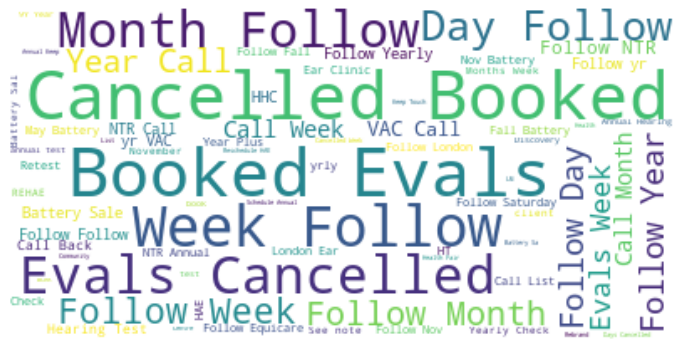

In [118]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=80, max_words=100, background_color="white").generate(' '.join(CallTypeDF['CallType']))
# Display the generated image:
plt.subplots(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### **Analyze the Call Frequency**

In [119]:
calls['Call_Frequency'] = 1 # we will use this variable to calculate aggregate by customer id. These are call made to customers.

#create a copy to remove duplicates, and add the call list back to main table later
calls_copy = calls.copy()
calls_copy.sort_values(by=['Date Created'],ascending=True, inplace=True)
calls_copy.drop_duplicates(subset=['Contact_ID','CallType'], keep='last',inplace=True)

calls_copy = calls_copy.reset_index()
calls_copy.drop(['index'], axis=1, inplace=True)

print(calls_copy.shape)
calls_copy.head(2)

(383820, 5)


Contact_ID Date Created   CallType       CallList  Call_Frequency
0  Foo1022578   2014-05-12  2 months   CALL_LIST_008               1
1  Foo1022549   2014-05-12  2 months   CALL_LIST_008               1

In [120]:
# Next aggregate all the calls by contact id and call type to get frequency of calls
Calls_Aggregate = calls.groupby(['Contact_ID','CallType'],sort=True)["Call_Frequency"].sum().reset_index().sort_values(by=['Call_Frequency'],ascending=False)
Calls_Aggregate = Calls_Aggregate.reset_index()
Calls_Aggregate.drop(['index'], axis=1, inplace=True)
Calls_Aggregate.columns = ['Contact_ID', 'CallType','Call_Frequency']


print(Calls_Aggregate.shape)
Calls_Aggregate.head(2)

(382328, 3)


Contact_ID  CallType  Call_Frequency
0  Foo2256369   2 Weeks              10
1  Foo2311498  3 Months               9

In [121]:
#Drop frequency from Call
calls.drop(['Call_Frequency'], axis=1, inplace=True)
calls_copy.drop(['Call_Frequency'], axis=1, inplace=True)
Calls_Aggregate = Calls_Aggregate.merge(calls_copy, on=['Contact_ID','CallType'], how='left')

In [122]:
print(Calls_Aggregate.shape)
Calls_Aggregate.columns = ['Contact_ID','CallType','Call_Frequency','Call Date','CallList']
Calls_Aggregate.head(5)

(382328, 5)


Contact_ID  CallType  Call_Frequency   Call Date       CallList
0  Foo2256369   2 Weeks              10  2018-02-01  CALL_LIST_006
1  Foo2311498  3 Months               9  2018-07-27  CALL_LIST_007
2  Foo2293285  3 Months               9  2020-03-04  CALL_LIST_007
3  Foo2299363    2 Days               8  2017-07-10  CALL_LIST_007
4  Foo2257502   2 Weeks               8  2018-11-19  CALL_LIST_007

### **Frequency Distribution for Calllist**

In [123]:
CallList = calls['CallList'].value_counts()
CallTypeDF = pd.DataFrame({
'CallList': CallList.index,
'Frequency': CallList.values,
'Percent': ((CallList.values/CallList.values.sum())*100).round(2),
'Cumulative Frequency': CallList.values.cumsum(),
'Cumulative Percent': ((CallList.values.cumsum()/CallList.values.sum())*100).round(2)
})
CallTypeDF

CallList  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0   CALL_LIST_007     127357    30.65                127357               30.65
1   CALL_LIST_002     105790    25.46                233147               56.10
2   CALL_LIST_006      77398    18.62                310545               74.72
3   CALL_LIST_001      38539     9.27                349084               84.00
4   CALL_LIST_005      27003     6.50                376087               90.50
5   CALL_LIST_008      25590     6.16                401677               96.65
6   CALL_LIST_004       7094     1.71                408771               98.36
7   CALL_LIST_003       5996     1.44                414767               99.80
8   CALL_LIST_999        661     0.16                415428               99.96
9   CALL_LIST_011         91     0.02                415519               99.98
10  CALL_LIST_012         39     0.01                415558               99.99
11  CALL_LIST_010         14     0.00                415572              100.00
12  CALL_LIST_009          9     0.00                415581              100.00
13       CAM10005          2     0.00                415583              100.00
14       CAM10027          1     0.00                415584              100.00
15     CAM9999999          1     0.00                415585              100.00

## **Contacts**

In [124]:
contacts = pd.read_csv('/content/drive/MyDrive/Sonova/contacts.csv')

In [125]:
contacts.shape

(217757, 5)

In [126]:
contacts.head(2)

Contact_ID  Gender Post Code  Deceased  YearOfBirth
0  Foo1000001  Female    M1T2J6         0         1932
1  Foo1000004  Female    T5E1H2         1         1933

### **Frequency Distribution for Gender and Deceased**

In [127]:
Gender = contacts['Gender'].value_counts()
GenderDF = pd.DataFrame({
'Gender': Gender.index,
'Frequency': Gender.values,
'Percent': ((Gender.values/Gender.values.sum())*100).round(2),
'Cumulative Frequency': Gender.values.cumsum(),
'Cumulative Percent': ((Gender.values.cumsum()/Gender.values.sum())*100).round(2)
})
GenderDF

Gender  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0     Male     106069    48.71                106069               48.71
1   Female      77732    35.70                183801               84.41
2  Unknown      33956    15.59                217757              100.00

In [128]:
Deceased = contacts['Deceased'].value_counts()
DeceasedDF = pd.DataFrame({
'Deceased': Deceased.index,
'Frequency': Deceased.values,
'Percent': ((Deceased.values/Deceased.values.sum())*100).round(2),
'Cumulative Frequency': Deceased.values.cumsum(),
'Cumulative Percent': ((Deceased.values.cumsum()/Deceased.values.sum())*100).round(2)
})
DeceasedDF

Deceased  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0         0     188692    86.65                188692               86.65
1         1      29065    13.35                217757              100.00

**there are 29065 deceased clients, so i will exclude them from the training set w.r.t Business Case**.

### **To Analyze the locations (POST CODE), i am using an additional dataset, that will convert postal code into latitudes and Longtitudes (For data visualization and City names (could be useful for ML models and business insights)**

In [129]:
CAN_Postal_Code = pd.read_csv('/content/drive/MyDrive/Sonova/CanadianPostalCodes202108.csv')
CAN_Postal_Code.drop_duplicates(subset=['POST_CODE'], keep='last',inplace=True)
print(CAN_Postal_Code.shape)
CAN_Postal_Code.head(4)

(891909, 7)


POSTAL_CODE POST_CODE                CITY  ... TIME_ZONE   LATITUDE  LONGITUDE
0     A0A 0A2    A0A0A2            HOLYROOD  ...         3  47.385590 -53.134060
1     A0A 0A6    A0A0A6       CLARKES BEACH  ...         3  47.552368 -53.285870
2     A0A 0A7    A0A0A7  CONCEPTION HARBOUR  ...         3  47.440189 -53.211620
3     A0A 0B5    A0A0B5            FERMEUSE  ...         3  46.973969 -52.958092

[4 rows x 7 columns]

In [130]:
contacts.columns = ['Contact_ID','Gender','POST_CODE','Deceased','YearOfBirth']

**Join Contacts with Can_Postal_Codes**

In [131]:
Contacts_Updated = contacts.merge(CAN_Postal_Code, on='POST_CODE', how='left')
Contacts_Updated.drop(['POSTAL_CODE','TIME_ZONE'], axis=1, inplace=True)
print(Contacts_Updated.shape)
Contacts_Updated.head(5)

(217757, 9)


Contact_ID   Gender POST_CODE  ...  PROVINCE_ABBR   LATITUDE   LONGITUDE
0  Foo1000001   Female    M1T2J6  ...             ON  43.784099  -79.304344
1  Foo1000004   Female    T5E1H2  ...             AB  53.595290 -113.470142
2  Foo1000005   Female    L0R1B2  ...             ON  43.125154  -79.453372
3  Foo1000010     Male    M1G2G5  ...             ON  43.764599  -79.215111
4  Foo1000012  Unknown    L5J3M4  ...             ON  43.525730  -79.643630

[5 rows x 9 columns]

### **DATA VIZ: Analyze the most number of clients from which region**

In [132]:
PostCode = Contacts_Updated.groupby(['PROVINCE_ABBR', 'CITY','LATITUDE','LONGITUDE'],sort=True)["Contact_ID"].count().reset_index().sort_values(by=['Contact_ID'],ascending=False)
PostCode = PostCode.reset_index()
PostCode.drop(['index'], axis=1, inplace=True)
PostCode.columns = ['PROVINCE_ABBR', 'CITY','LATITUDE','LONGITUDE', 'FREQUENCY']
print(PostCode.shape)
PostCode.head(5)

(83048, 5)


PROVINCE_ABBR         CITY   LATITUDE   LONGITUDE  FREQUENCY
0            NS   MEADOWVALE  45.074551  -64.720682        412
1            PE   KENSINGTON  46.437890  -63.634580        257
2            BC  GRAND FORKS  49.106210 -118.465857        236
3            BC      SECHELT  49.474083 -123.754707        235
4            NS      BERWICK  45.090922  -64.823309        211

**Insight : Top 5 Cities are MEADOWVALE, KENSINGTON, SECHELT, GRAND FORKS and BERWICK**

In [133]:
import plotly.express as px

PostCode['text'] = PostCode['CITY'] + ', '+ PostCode['PROVINCE_ABBR'] + ' - Total Clients: ' + PostCode['FREQUENCY'].astype(str)

fig = px.scatter_mapbox(PostCode, lat='LATITUDE', lon='LONGITUDE', color ='FREQUENCY',size = 'FREQUENCY',hover_name = 'text',
                  hover_data={'LATITUDE':False,'LONGITUDE':False,'FREQUENCY':False},
                  color_continuous_scale="portland", size_max=15, zoom=3,
                  mapbox_style="carto-positron")
fig.show()

### **DATA VIZ: Analyze the most number of clients from which Province**

In [134]:
colors = ['Other Provinces'] * 13
colors[12] = 'Major Province'
Province = Contacts_Updated.groupby(['PROVINCE_ABBR'],sort=True)["Contact_ID"].count().reset_index().sort_values(by=['Contact_ID'],ascending=False)
Province = Province.reset_index()
Province.drop(['index'], axis=1, inplace=True)
Province.columns = ['PROVINCE_ABBR', 'FREQUENCY']

FreQuency_Total = sum(Province['FREQUENCY'])
Province['FREQUENCY_PERCENTAGE'] = round((Province['FREQUENCY']/FreQuency_Total) * 100,0)

Province = Province.sort_values(by=['FREQUENCY_PERCENTAGE'])
fig = px.bar(Province, y="PROVINCE_ABBR", x="FREQUENCY_PERCENTAGE", orientation='h', width = 1000, height=500,color=colors,title="Client Base : Top Provinces : BC, ON and AB")
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='FREQUENCY_PERCENTAGE: %{x}% <br> PROVINCE_ABBR: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))
fig.show()

## **Sale**

In [135]:
sale = pd.read_csv('/content/drive/MyDrive/Sonova/sale.csv',header=None, sep='\n')
sale = sale[0].str.split(',', expand=True)
sale.columns = ['Contact_ID','Sales Date','Side','Discount Code']
sale = sale.iloc[1: , :]

In [136]:
sale.shape

(694954, 4)

In [137]:
sale.head(2)

Contact_ID  Sales Date   Side Discount Code
1  Foo2611391  2014-03-04   Left              
2  Foo2611391  2014-03-04  Right

### **DATA VIZ : Lets Analyze Sales for last 10 years**

In [138]:
Sale_by_year = sale.copy()
Sale_by_year['Sales_Date'] = Sale_by_year['Sales Date'].astype('datetime64[ns]')
Sale_by_year['Sales_year'] = (Sale_by_year.Sales_Date.dt.year).astype('Int64')
Sale_by_year['Frequency'] =1 #default 1 for each sale
Sale_by_year.drop(['Sales Date','Sales_Date'], axis=1, inplace=True)

In [139]:
Sale_by_year = Sale_by_year.groupby(['Sales_year','Side'])['Frequency'].sum().reset_index().sort_values(by=['Sales_year'],ascending=False)
Sale_by_year = Sale_by_year.reset_index()
Sale_by_year.drop(['index'],axis=1,inplace=True) 
Sale_by_year = Sale_by_year[(Sale_by_year.Sales_year >= 2011) & (Sale_by_year.Sales_year <= 2021)]

In [140]:
import plotly.express as px

fig = px.bar(Sale_by_year, x="Sales_year", y="Frequency", color="Side",text='Frequency',title="Last 10 years Sales Data")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

### **Lets Evaluate the frequency for discount code and Side**

In [141]:
DiscountCode = sale['Discount Code'].value_counts()
DiscountCodeDF = pd.DataFrame({
'DiscountCode': DiscountCode.index,
'Frequency': DiscountCode.values,
'Percent': ((DiscountCode.values/DiscountCode.values.sum())*100).round(2),
'Cumulative Frequency': DiscountCode.values.cumsum(),
'Cumulative Percent': ((DiscountCode.values.cumsum()/DiscountCode.values.sum())*100).round(2)
})
DiscountCodeDF.head(4)

DiscountCode  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0                  546959    78.70                546959               78.70
1         2002      28903     4.16                575862               82.86
2         2001      23964     3.45                599826               86.31
3         2000       9232     1.33                609058               87.64

**There are 546959 customers with no discount code**

In [142]:
Side = sale['Side'].value_counts()
SideDF = pd.DataFrame({
'Side': Side.index,
'Frequency': Side.values,
'Percent': ((Side.values/Side.values.sum())*100).round(2),
'Cumulative Frequency': Side.values.cumsum(),
'Cumulative Percent': ((Side.values.cumsum()/Side.values.sum())*100).round(2)
})
SideDF.head(4)

Side  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0  Right     365273    52.56                365273               52.56
1   Left     329680    47.44                694953              100.00
2     RM          1     0.00                694954              100.00

**Hearing aid (Right Ear piece) are sold more than left, but considering this is an extract from 2014, it is not a significant difference**

### **Going back to our business problem, I want to predict which customer is most likely to purchase hearing aid, Thus from Sales data, I can check, which customers have repurchased the hearing aid in the past. From here, we will get our target variable. Repurchased = 1, else 0 Also note that i am considering repurchase, based on the Contact_ID and Side.**

In [143]:
sale['Frequency'] = 1 # we will use this variable to calculate aggregate by customer id, if customer has repurchased or not, if final fequency > 1. repurchased =1, else 0
sale.sort_values(by=['Sales Date'],ascending=True, inplace=True)

### **Target Variable = isRepurchase**

In [144]:
Sale_Aggregate = sale.groupby(['Contact_ID','Side'],sort=True)["Frequency"].sum().reset_index().sort_values(by=['Frequency'],ascending=False)
Sale_Aggregate = Sale_Aggregate.reset_index()
Sale_Aggregate.drop(['index'], axis=1, inplace=True)
Sale_Aggregate.columns = ['Contact_ID', 'Side','Frequency']

#isRepurchase is the target variable
Sale_Aggregate['isRepurchase'] = 0 #Default
Sale_Aggregate.loc[Sale_Aggregate['Frequency'] > 1, 'isRepurchase'] = '1'
Sale_Aggregate.drop(['Frequency'], axis=1, inplace=True)

#Sort by Contact id, after all calculation
Sale_Aggregate.sort_values(by=['Contact_ID'],ascending=False, inplace=True)
Sale_Aggregate = Sale_Aggregate.reset_index()
Sale_Aggregate.drop(['index'], axis=1, inplace=True)

sale.drop(['Frequency'], axis=1, inplace=True)

print(Sale_Aggregate.shape)
Sale_Aggregate.head(5)

(390453, 3)


Contact_ID   Side isRepurchase
0  Foo9012915  Right            0
1  Foo9012915   Left            0
2  Foo9012912  Right            0
3  Foo9012912   Left            0
4  Foo9012911   Left            1

### **Check for Class Imbalance**

In [145]:
isRepurchase = Sale_Aggregate['isRepurchase'].value_counts()
isRepurchaseDF = pd.DataFrame({
'isRepurchase': isRepurchase.index,
'Frequency': isRepurchase.values,
'Percent': ((isRepurchase.values/isRepurchase.values.sum())*100).round(2),
'Cumulative Frequency': isRepurchase.values.cumsum(),
'Cumulative Percent': ((isRepurchase.values.cumsum()/isRepurchase.values.sum())*100).round(2)
})
isRepurchaseDF.head(4)

isRepurchase  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0            0     218726    56.02                218726               56.02
1            1     171727    43.98                390453              100.00

## **Prepare the Final Dataset for Modelling**

### **Get the Last purchase date and discount code from Sales Data**

In [146]:
sale.drop_duplicates(subset=['Contact_ID','Side'], keep='last',inplace=True) #keep the latest records, we earlier sorted the sales in descending order

In [147]:
Dataset = Sale_Aggregate.merge(sale, on=['Contact_ID','Side'], how='left')

In [148]:
Dataset.shape

(390453, 5)

In [149]:
Dataset.head(2)

Contact_ID   Side isRepurchase  Sales Date Discount Code
0  Foo9012915  Right            0  2016-04-20          2002
1  Foo9012915   Left            0  2016-04-20          2002

### **Add Customer Information to the "Dataset", but duly note to exclude the deceased customers**

In [150]:
Dataset_Stage_2 = Dataset.merge(Contacts_Updated, on=['Contact_ID'], how='left')
print(Dataset_Stage_2.shape)

(390453, 13)


In [151]:
Dataset_Stage_2 = Dataset_Stage_2[Dataset_Stage_2['Deceased']==0]
Dataset_Stage_2['YearOfBirth'] = Dataset_Stage_2['YearOfBirth'].astype(int)
Dataset_Stage_2.drop(['Deceased'], axis=1, inplace=True) 
print(Dataset_Stage_2.shape)
Dataset_Stage_2.head(5)

(337587, 12)


Contact_ID   Side isRepurchase  ... PROVINCE_ABBR   LATITUDE  LONGITUDE
0  Foo9012915  Right            0  ...            ON  43.751134 -79.320415
1  Foo9012915   Left            0  ...            ON  43.751134 -79.320415
2  Foo9012912  Right            0  ...            ON  44.079810 -79.539912
3  Foo9012912   Left            0  ...            ON  44.079810 -79.539912
4  Foo9012911   Left            1  ...            ON  43.756711 -79.304245

[5 rows x 12 columns]

**Recheck Class Imbalance : Not Much Effect**

In [152]:
isRepurchase = Dataset_Stage_2['isRepurchase'].value_counts()
isRepurchaseDF = pd.DataFrame({
'isRepurchase': isRepurchase.index,
'Frequency': isRepurchase.values,
'Percent': ((isRepurchase.values/isRepurchase.values.sum())*100).round(2),
'Cumulative Frequency': isRepurchase.values.cumsum(),
'Cumulative Percent': ((isRepurchase.values.cumsum()/isRepurchase.values.sum())*100).round(2)
})
isRepurchaseDF.head(4)

isRepurchase  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0            0     193158    57.22                193158               57.22
1            1     144429    42.78                337587              100.00

### **ADD Sales Call Data to the new dataset**

In [153]:
Dataset_Stage_3 = Dataset_Stage_2.merge(Calls_Aggregate, on=['Contact_ID'], how='left')
print(Dataset_Stage_3.shape)

(613423, 16)


**The number of records may have increased as the customer may get multiple call for reminders and promotional offers.**

In [154]:
Dataset_Stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613423 entries, 0 to 613422
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Contact_ID      613423 non-null  object 
 1   Side            613423 non-null  object 
 2   isRepurchase    613423 non-null  object 
 3   Sales Date      613423 non-null  object 
 4   Discount Code   613422 non-null  object 
 5   Gender          613423 non-null  object 
 6   POST_CODE       606410 non-null  object 
 7   YearOfBirth     613423 non-null  int64  
 8   CITY            540816 non-null  object 
 9   PROVINCE_ABBR   540816 non-null  object 
 10  LATITUDE        540816 non-null  float64
 11  LONGITUDE       540816 non-null  float64
 12  CallType        464585 non-null  object 
 13  Call_Frequency  464585 non-null  float64
 14  Call Date       464585 non-null  object 
 15  CallList        464585 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 79.6+ 

**Recheck Class Imbalance : Much better Class balance**

In [155]:
isRepurchase = Dataset_Stage_3['isRepurchase'].value_counts()
isRepurchaseDF = pd.DataFrame({
'isRepurchase': isRepurchase.index,
'Frequency': isRepurchase.values,
'Percent': ((isRepurchase.values/isRepurchase.values.sum())*100).round(2),
'Cumulative Frequency': isRepurchase.values.cumsum(),
'Cumulative Percent': ((isRepurchase.values.cumsum()/isRepurchase.values.sum())*100).round(2)
})
isRepurchaseDF.head(4)

isRepurchase  Frequency  Percent  Cumulative Frequency  Cumulative Percent
0            0     324348    52.88                324348               52.88
1            1     289075    47.12                613423              100.00

### **we add Audiogram to get the final dataset**

In [156]:
Dataset_Final = Dataset_Stage_3.merge(audiogram, on=['Contact_ID'], how='left')
print(Dataset_Final.shape)
Dataset_Final.head(2)

(613423, 19)


Contact_ID   Side  ... Left Loss Level Right Loss Level
0  Foo9012915  Right  ...              L2               L2
1  Foo9012915   Left  ...              L2               L2

[2 rows x 19 columns]

In [157]:
Dataset_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613423 entries, 0 to 613422
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Contact_ID        613423 non-null  object 
 1   Side              613423 non-null  object 
 2   isRepurchase      613423 non-null  object 
 3   Sales Date        613423 non-null  object 
 4   Discount Code     613422 non-null  object 
 5   Gender            613423 non-null  object 
 6   POST_CODE         606410 non-null  object 
 7   YearOfBirth       613423 non-null  int64  
 8   CITY              540816 non-null  object 
 9   PROVINCE_ABBR     540816 non-null  object 
 10  LATITUDE          540816 non-null  float64
 11  LONGITUDE         540816 non-null  float64
 12  CallType          464585 non-null  object 
 13  Call_Frequency    464585 non-null  float64
 14  Call Date         464585 non-null  object 
 15  CallList          464585 non-null  object 
 16  Combined Loss     39

## **Feature Engineering and Feature Selection**

### **Date Values**

In [158]:
Dataset_Final['Sales_Date'] = Dataset_Final['Sales Date'].astype('datetime64[ns]')
Dataset_Final['Call_Date'] = Dataset_Final['Call Date'].astype('datetime64[ns]')

Dataset_Final['Sales_year'] = (Dataset_Final.Sales_Date.dt.year).astype('Int64')
Dataset_Final['Sales_month'] = (Dataset_Final.Sales_Date.dt.month).astype('Int64')
Dataset_Final['Sales_day'] = (Dataset_Final.Sales_Date.dt.weekday).astype('Int64')
Dataset_Final['Sales_weekend'] = np.where(Dataset_Final['Sales_day'] > 5, 1, 0)

Dataset_Final['Call_year'] = (Dataset_Final.Call_Date.dt.year).astype('Int64')
Dataset_Final['Call_month'] = (Dataset_Final.Call_Date.dt.month).astype('Int64')
Dataset_Final['Call_day'] = (Dataset_Final.Call_Date.dt.weekday).astype('Int64')

Dataset_Final.drop(['Sales_Date','Call_Date','POST_CODE','Contact_ID','Sales Date','Call Date','CITY'], axis=1, inplace=True)

In [159]:
print(Dataset_Final.info())
Dataset_Final.tail(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613423 entries, 0 to 613422
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Side              613423 non-null  object 
 1   isRepurchase      613423 non-null  object 
 2   Discount Code     613422 non-null  object 
 3   Gender            613423 non-null  object 
 4   YearOfBirth       613423 non-null  int64  
 5   PROVINCE_ABBR     540816 non-null  object 
 6   LATITUDE          540816 non-null  float64
 7   LONGITUDE         540816 non-null  float64
 8   CallType          464585 non-null  object 
 9   Call_Frequency    464585 non-null  float64
 10  CallList          464585 non-null  object 
 11  Combined Loss     392818 non-null  object 
 12  Left Loss Level   494194 non-null  object 
 13  Right Loss Level  493561 non-null  object 
 14  Sales_year        613423 non-null  Int64  
 15  Sales_month       613423 non-null  Int64  
 16  Sales_day         61

Side isRepurchase Discount Code  ... Call_year  Call_month Call_day
613421  Right            0                ...      2018           1        0
613422  Right            0                ...      2018           1        3

[2 rows x 21 columns]

In [160]:
#i assume RM is an error entry.
Side  = Dataset_Final['Side'].value_counts()
SideDF = pd.DataFrame({
'isRepurchase': Side.index,
'Frequency': Side.values,
'Percent': ((Side.values/Side.values.sum())*100).round(2),
'Cumulative Frequency': Side.values.cumsum(),
'Cumulative Percent': ((Side.values.cumsum()/Side.values.sum())*100).round(2)
})
print(Side.head(4))

Dataset_Final = Dataset_Final[Dataset_Final['Side']!='RM']
Dataset_Final.shape

Right    313387
Left     300035
RM            1
Name: Side, dtype: int64


(613422, 21)

### **Call Type**

**Since Call Type is a customized text, I will use NLP Techniques to clean the data before training**

In [161]:
nltk.download('stopwords')
list_stopwords = stopwords.words("english")

My_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', 'call', 'Call']
list_stopwords = list_stopwords + My_list

print("list of stop words:" ,list_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
list of stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how

In [162]:
def preprocess_text(text, flg_stem = False, flg_lem = True, list_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s\d]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    
    ## remove Stopwords
    if list_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    list_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stem == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lem == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [163]:
# Apply preprocessing to text column for both train and test sets
%%time

pd.options.mode.chained_assignment = None
Dataset_Final['CallType_Clean'] = Dataset_Final['CallType'].apply(lambda x: preprocess_text(x, flg_stem=False, flg_lem=True, 
                                                              list_stopwords = list_stopwords))
pd.options.mode.chained_assignment = 'warn'

CPU times: user 12.4 s, sys: 26.3 ms, total: 12.4 s
Wall time: 12.4 s


In [164]:
#Test the technique
Dataset_Final[['CallType','CallType_Clean']].iloc[193425]
Dataset_Final.drop(['CallType'], axis=1, inplace=True)

In [165]:
Dataset_Final['Call_Frequency'] = Dataset_Final['Call_Frequency'].astype('Int64')
Dataset_Final['Side'].replace(['Left','Right'],[0,1],inplace=True)
Dataset_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613422 entries, 0 to 613422
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Side              613422 non-null  int64  
 1   isRepurchase      613422 non-null  object 
 2   Discount Code     613422 non-null  object 
 3   Gender            613422 non-null  object 
 4   YearOfBirth       613422 non-null  int64  
 5   PROVINCE_ABBR     540815 non-null  object 
 6   LATITUDE          540815 non-null  float64
 7   LONGITUDE         540815 non-null  float64
 8   Call_Frequency    464585 non-null  Int64  
 9   CallList          464585 non-null  object 
 10  Combined Loss     392818 non-null  object 
 11  Left Loss Level   494194 non-null  object 
 12  Right Loss Level  493561 non-null  object 
 13  Sales_year        613422 non-null  Int64  
 14  Sales_month       613422 non-null  Int64  
 15  Sales_day         613422 non-null  Int64  
 16  Sales_weekend     61

### **Check the Correlation**

In [166]:
%%time
df_cm = Dataset_Final.corr(method="spearman")
display(df_cm)

Side  YearOfBirth  ...  Call_month  Call_day
Side            1.000000    -0.015962  ...    0.001068  0.000700
YearOfBirth    -0.015962     1.000000  ...   -0.020652  0.005741
LATITUDE       -0.000787     0.002412  ...   -0.008665 -0.049346
LONGITUDE      -0.003387     0.056455  ...    0.020208  0.017444
Call_Frequency  0.000207     0.040341  ...   -0.015916  0.052306
Sales_year     -0.030353     0.156484  ...   -0.074212  0.032149
Sales_month    -0.000147    -0.004415  ...    0.336680  0.002200
Sales_day       0.001057     0.000620  ...   -0.001263  0.037199
Sales_weekend   0.001200    -0.017164  ...    0.001155  0.002801
Call_year      -0.004647     0.102421  ...   -0.245644 -0.244712
Call_month      0.001068    -0.020652  ...    1.000000  0.006626
Call_day        0.000700     0.005741  ...    0.006626  1.000000

[12 rows x 12 columns]

CPU times: user 5.09 s, sys: 188 ms, total: 5.28 s
Wall time: 5.27 s


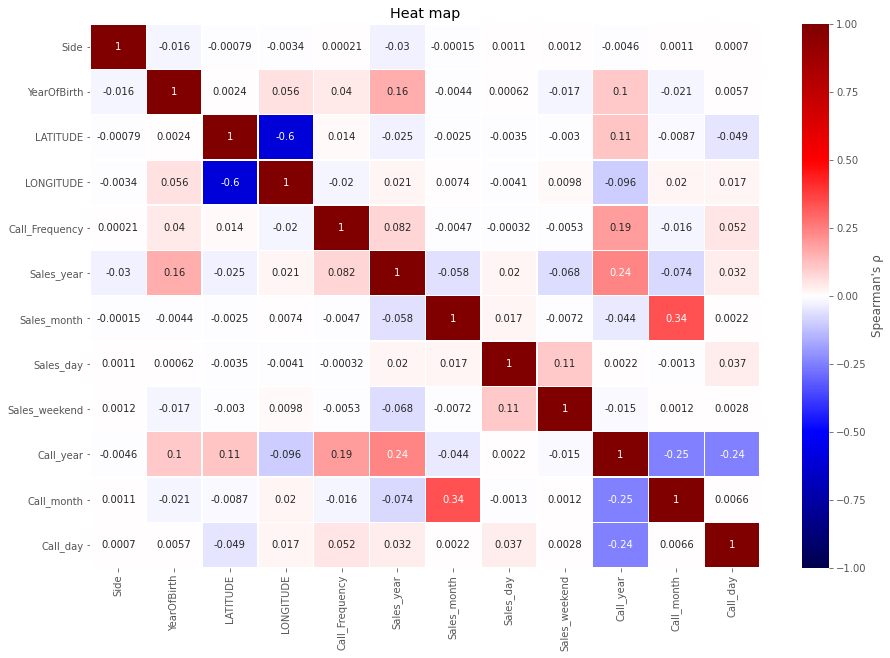

In [167]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");

## **Data Pipeline**

In [168]:
#Create Backup - First Checkpoint

Dataset_Final.to_csv('/content/drive/MyDrive/Sonova/DataSet_Version1.csv',index=0)

In [169]:
#Run from here if Colab fails
Dataset_Final = pd.read_csv('/content/drive/MyDrive/Sonova/DataSet_Version1.csv',low_memory=False)
Dataset_Final.shape

(613422, 21)

In [170]:
TRAIN = Dataset_Final.copy()

#All the Discount Codes need to be trained. Otherwise had errors in pipeline
TRAIN['Discount Code'] = np.where(Dataset_Final['Discount Code']=="", 0, 1)


TARGET = "isRepurchase"
columns_predictors = [col for col in TRAIN.columns if col not in [TARGET]]
columns_categorical = ['Side','Sales_weekend','Discount Code', 'Gender', 'PROVINCE_ABBR', 'CallList', 'Combined Loss', 'Left Loss Level','Right Loss Level']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical and col not in 'CallType_Clean'] 

print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: isRepurchase
columns_predictors: ['Side', 'Discount Code', 'Gender', 'YearOfBirth', 'PROVINCE_ABBR', 'LATITUDE', 'LONGITUDE', 'Call_Frequency', 'CallList', 'Combined Loss', 'Left Loss Level', 'Right Loss Level', 'Sales_year', 'Sales_month', 'Sales_day', 'Sales_weekend', 'Call_year', 'Call_month', 'Call_day', 'CallType_Clean']
columns_categorical: ['Side', 'Sales_weekend', 'Discount Code', 'Gender', 'PROVINCE_ABBR', 'CallList', 'Combined Loss', 'Left Loss Level', 'Right Loss Level']
columns_numerical: ['YearOfBirth', 'LATITUDE', 'LONGITUDE', 'Call_Frequency', 'Sales_year', 'Sales_month', 'Sales_day', 'Call_year', 'Call_month', 'Call_day']


In [171]:
X = TRAIN[columns_predictors]
y = TRAIN[TARGET]

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = X['Side']) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (490737, 20)
X_test.shape: (122685, 20)
y_train.shape: (490737,)
y_test.shape: (122685,)


### **Check for Missing Values**

In [173]:
obs = X_train.isnull().sum().sort_values(ascending = False)
percent = round(X_train.isnull().sum().sort_values(ascending = False)/len(X_train)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

Number of Observations  Percent
Combined Loss                     176589    35.98
CallType_Clean                    118944    24.24
Call_month                        118943    24.24
Call_day                          118943    24.24
Call_Frequency                    118943    24.24
Call_year                         118943    24.24
CallList                          118943    24.24
Right Loss Level                   95942    19.55
Left Loss Level                    95366    19.43
LONGITUDE                          58083    11.84
LATITUDE                           58083    11.84
PROVINCE_ABBR                      58083    11.84
Sales_year                             0     0.00
Sales_month                            0     0.00
Sales_day                              0     0.00
Sales_weekend                          0     0.00
YearOfBirth                            0     0.00
Gender                                 0     0.00
Discount Code                          0     0.00
Side                                   0     0.00

In [174]:
obs = X_test.isnull().sum().sort_values(ascending = False)
percent = round(X_test.isnull().sum().sort_values(ascending = False)/len(X_test)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

Number of Observations  Percent
Combined Loss                      44015    35.88
CallType_Clean                     29895    24.37
Call_month                         29894    24.37
Call_day                           29894    24.37
Call_Frequency                     29894    24.37
Call_year                          29894    24.37
CallList                           29894    24.37
Right Loss Level                   23919    19.50
Left Loss Level                    23862    19.45
LONGITUDE                          14524    11.84
LATITUDE                           14524    11.84
PROVINCE_ABBR                      14524    11.84
Sales_year                             0     0.00
Sales_month                            0     0.00
Sales_day                              0     0.00
Sales_weekend                          0     0.00
YearOfBirth                            0     0.00
Gender                                 0     0.00
Discount Code                          0     0.00
Side                                   0     0.00

In [175]:
pd.options.mode.chained_assignment = None
# get the imputed values for some missing observations
X_train['Combined Loss'].fillna("Unknown", inplace=True)
X_train['Right Loss Level'].fillna("Unknown", inplace=True)
X_train['Left Loss Level'].fillna("Unknown", inplace=True)
X_train['PROVINCE_ABBR'].fillna("Unknown", inplace=True)
X_train['CallList'].fillna("Unknown", inplace=True)

#Impute Numerical Features
X_train['Call_Frequency'].fillna(0, inplace=True)
X_train['Call_month'].fillna(0, inplace=True)
X_train['Call_year'].fillna(0, inplace=True)
X_train['Call_day'].fillna(0, inplace=True)
X_train['LATITUDE'].fillna(0, inplace=True)
X_train['LONGITUDE'].fillna(0, inplace=True)

# get the imputed values for some missing observations
X_test['Combined Loss'].fillna("Unknown", inplace=True)
X_test['Right Loss Level'].fillna("Unknown", inplace=True)
X_test['Left Loss Level'].fillna("Unknown", inplace=True)
X_test['PROVINCE_ABBR'].fillna("Unknown", inplace=True)
X_test['CallList'].fillna("Unknown", inplace=True)


#Impute Numerical Features
X_test['Call_Frequency'].fillna(0, inplace=True)
X_test['Call_month'].fillna(0, inplace=True)
X_test['Call_year'].fillna(0, inplace=True)
X_test['Call_day'].fillna(0, inplace=True)
X_test['LATITUDE'].fillna(0, inplace=True)
X_test['LONGITUDE'].fillna(0, inplace=True)

pd.options.mode.chained_assignment = 'warn'

In [176]:
#Drop Call Type clean, because we already have a sparse matrix for it.
pd.options.mode.chained_assignment = None
X_tr = X_train[['Side', 'Sales_weekend', 'Discount Code', 'Gender', 'PROVINCE_ABBR', 'CallList', 'Combined Loss', 'Left Loss Level', 'Right Loss Level','YearOfBirth', 'LATITUDE', 'LONGITUDE', 'Call_Frequency', 'Sales_year', 'Sales_month', 'Sales_day', 'Call_year', 'Call_month', 'Call_day']]
X_te = X_test[['Side', 'Sales_weekend', 'Discount Code', 'Gender', 'PROVINCE_ABBR', 'CallList', 'Combined Loss', 'Left Loss Level', 'Right Loss Level','YearOfBirth', 'LATITUDE', 'LONGITUDE', 'Call_Frequency', 'Sales_year', 'Sales_month', 'Sales_day', 'Call_year', 'Call_month', 'Call_day']]
pd.options.mode.chained_assignment = 'warn'

### **Build Sklearn Pipeline**

In [177]:
#Create numerical pipeline to transform numerical values

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler
from sklearn.impute import SimpleImputer

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)
columns_noaffect = list(columns_numerical)

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder()),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

In [178]:
X_tr_transformed = pipeline_full.fit_transform(X_tr)
X_te_transformed = pipeline_full.transform(X_te)
print(f"X_train_transformed.shape: {X_tr_transformed.shape}")
print(f"X_test_transformed.shape: {X_te_transformed.shape}")

X_train_transformed.shape: (490737, 71)
X_test_transformed.shape: (122685, 71)


In [179]:
import warnings
warnings.filterwarnings("ignore")
import sklearn

#https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [180]:
#get_feature_names(pipeline_full)
import scipy.sparse

X_train_DF = pd.DataFrame(X_tr_transformed.toarray())
X_train_DF.columns = get_feature_names(pipeline_full)

In [181]:
X_test_DF = pd.DataFrame(X_te_transformed.toarray())
X_test_DF.columns = get_feature_names(pipeline_full)

### **Drop the Dummy variables for unknown**

In [182]:
X_train_DF.drop(['onehot__x0_0','onehot__x1_0','onehot__x3_Unknown','onehot__x4_Unknown','onehot__x5_Unknown','onehot__x6_Unknown','onehot__x7_Unknown','onehot__x8_Unknown'], axis=1, inplace=True)
X_test_DF.drop(['onehot__x0_0','onehot__x1_0','onehot__x3_Unknown','onehot__x4_Unknown','onehot__x5_Unknown','onehot__x6_Unknown','onehot__x7_Unknown','onehot__x8_Unknown'], axis=1, inplace=True)
print(X_train_DF.shape)
print(X_test_DF.shape)

(490737, 63)
(122685, 63)


In [183]:
X_train_DF.columns = ['Side','Sales_weekend','Discount_Code','Gender_Female','Gender_Male','PROVINCE_ABBR_AB','PROVINCE_ABBR_BC','PROVINCE_ABBR_MB','PROVINCE_ABBR_NB','PROVINCE_ABBR_NL',
                      'PROVINCE_ABBR_NS','PROVINCE_ABBR_NT','PROVINCE_ABBR_NU','PROVINCE_ABBR_ON','PROVINCE_ABBR_PE','PROVINCE_ABBR_QC','PROVINCE_ABBR_SK','PROVINCE_ABBR_YT','CALL_LIST_001',
                      'CALL_LIST_002','CALL_LIST_003','CALL_LIST_004','CALL_LIST_005','CALL_LIST_006','CALL_LIST_007','CALL_LIST_008','CALL_LIST_011','CALL_LIST_012','CALL_LIST_999',
                      'Combined_Loss-L1',	'Combined_Loss-L2',	'Combined_Loss-L3',	'Combined_Loss-L4','Combined_Loss-L5','Combined_Loss-L6','Left_Loss_Level-L1','Left_Loss_Level-L2',
                      'Left_Loss_Level-L3','Left_Loss_Level-L4','Left_Loss_Level-L5','Left_Loss_Level-L6','Left_Loss_Level-L7','Left_Loss_Level-L8','Left_Loss_Level-L9','Right_Loss_Level-L1',
                      'Right_Loss_Level-L2','Right_Loss_Level-L3','Right_Loss_Level-L4','Right_Loss_Level-L5','Right_Loss_Level-L6','Right_Loss_Level-L7','Right_Loss_Level-L8','Right_Loss_Level-L9',
                      'YearOfBirth','LATITUDE',	'LONGITUDE',	'CallFrequency',	'Salesyear',	'Salesmonth',	'Salesday',	'Callyear',	'Callmonth',	'Callday']

X_test_DF.columns = ['Side','Sales_weekend','Discount_Code','Gender_Female','Gender_Male','PROVINCE_ABBR_AB','PROVINCE_ABBR_BC','PROVINCE_ABBR_MB','PROVINCE_ABBR_NB','PROVINCE_ABBR_NL',
                      'PROVINCE_ABBR_NS','PROVINCE_ABBR_NT','PROVINCE_ABBR_NU','PROVINCE_ABBR_ON','PROVINCE_ABBR_PE','PROVINCE_ABBR_QC','PROVINCE_ABBR_SK','PROVINCE_ABBR_YT','CALL_LIST_001',
                      'CALL_LIST_002','CALL_LIST_003','CALL_LIST_004','CALL_LIST_005','CALL_LIST_006','CALL_LIST_007','CALL_LIST_008','CALL_LIST_011','CALL_LIST_012','CALL_LIST_999',
                      'Combined_Loss-L1',	'Combined_Loss-L2',	'Combined_Loss-L3',	'Combined_Loss-L4','Combined_Loss-L5','Combined_Loss-L6','Left_Loss_Level-L1','Left_Loss_Level-L2',
                      'Left_Loss_Level-L3','Left_Loss_Level-L4','Left_Loss_Level-L5','Left_Loss_Level-L6','Left_Loss_Level-L7','Left_Loss_Level-L8','Left_Loss_Level-L9','Right_Loss_Level-L1',
                      'Right_Loss_Level-L2','Right_Loss_Level-L3','Right_Loss_Level-L4','Right_Loss_Level-L5','Right_Loss_Level-L6','Right_Loss_Level-L7','Right_Loss_Level-L8','Right_Loss_Level-L9',
                      'YearOfBirth','LATITUDE',	'LONGITUDE',	'CallFrequency',	'Salesyear',	'Salesmonth',	'Salesday',	'Callyear',	'Callmonth',	'Callday']


### **Add TFIDF Transformation for Call Type Clean to Pipeline.**

**TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.**

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

In [185]:
from sklearn.pipeline import Pipeline

TFIDF_PCA = Pipeline([
    ("TFIDF", TfidfVectorizer(analyzer='word', stop_words = 'english')),                
    ("pca", TruncatedSVD(n_components=50, random_state=42)),
])

In [186]:
Train_TFIDF = TFIDF_PCA.fit_transform(X_train['CallType_Clean'].values.astype('U'))
Test_TFIDF = TFIDF_PCA.transform(X_test['CallType_Clean'].values.astype('U'))

In [187]:
from scipy.sparse import hstack
Train_TFIDF_DF = pd.DataFrame(Train_TFIDF)
Test_TFIDF_DF = pd.DataFrame(Test_TFIDF)

In [188]:
TFID_Columns = []
for i in range(1, 51):
  TFID_Columns.append('TFID'+str(i))

In [189]:
#print the processed data shape
Train_TFIDF_DF.columns = TFID_Columns
Test_TFIDF_DF.columns = TFID_Columns
print(Train_TFIDF_DF.shape)
print(Test_TFIDF_DF.shape)

(490737, 50)
(122685, 50)


## **Add TFIDF+PCA Results to Final DataFrame**

In [190]:
X_tr_Final = pd.merge(X_train_DF, Train_TFIDF_DF, left_index=True, right_index=True)
X_te_Final = pd.merge(X_test_DF, Test_TFIDF_DF, left_index=True, right_index=True)

In [191]:
print(X_tr_Final.shape)
print(X_te_Final.shape)

(490737, 113)
(122685, 113)


In [192]:
X_tr_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490737 entries, 0 to 490736
Columns: 113 entries, Side to TFID50
dtypes: float64(113)
memory usage: 423.1 MB


In [193]:
X_tr_Final.to_parquet('/content/drive/MyDrive/Sonova/Train.parquet')
X_te_Final.to_parquet('/content/drive/MyDrive/Sonova/Test.parquet')
print('First Stage Complete.')

First Stage Complete.


**Export Y Data**

In [194]:
y_traindf = pd.DataFrame(y_train)
y_traindf = y_traindf.reset_index()
y_traindf.drop(['index'],axis=1, inplace=True)
y_traindf.head(2)
y_traindf.shape

(490737, 1)

In [195]:
y_testdf = pd.DataFrame(y_test)
y_testdf = y_test.reset_index()
y_testdf.drop(['index'],axis=1, inplace=True)
y_testdf.head(2)
y_testdf.shape

(122685, 1)

In [196]:
y_traindf.to_csv('/content/drive/MyDrive/Sonova/y_Train.csv', index=0)
y_testdf.to_csv('/content/drive/MyDrive/Sonova/y_Test.csv',index=0)